In [25]:
from Vectorise import ImageVec
import matplotlib.pyplot as plt
import numpy as np

from ngsolve import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
from netgen.geom2d import SplineGeometry
from netgen.occ import *

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

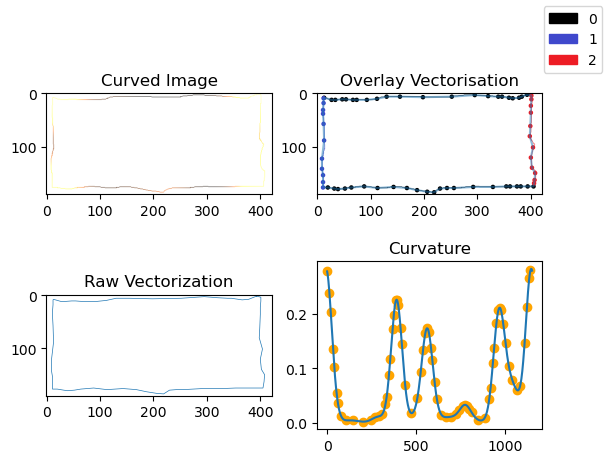

In [35]:
fig1 = plt.gcf()
vec = ImageVec('Images/Rectangle.png')
pnts = vec.GetVectorisation(kWidth = 20, blurRadius = 30, numSegments = 60, display = True);

#pnts = (pnts-np.min(pnts))/(np.max(pnts)-np.min(pnts))

In [27]:
geo = SplineGeometry()
vec.GenerateGeometry(geo, 2)

In [28]:
geo.SetDomainMaxH(4, 0.01)
ngmesh = geo.GenerateMesh(maxh=0.1)

In [29]:
geo.SetDomainMaxH(4, 0.01)
ngmesh = geo.GenerateMesh(maxh=0.1)
mesh = Mesh(ngmesh)
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [34]:
V = VectorH1(mesh,order=3, dirichlet="0|1|2")
Q = H1(mesh,order=2)
X = V*Q

u,p = X.TrialFunction()
v,q = X.TestFunction()

nu = 0.001  # viscosity
stokes = (nu*InnerProduct(grad(u), grad(v))+ \
    div(u)*q+div(v)*p - 1e-10*p*q)*dx

a = BilinearForm(stokes).Assemble()

# nothing here ...
f = LinearForm(X).Assemble()

# gridfunction for the solution
gfu = GridFunction(X)

uin = CoefficientFunction( (1.5*4*x*(0.41-x)/(0.41*0.41), 0) )
#uin = CoefficientFunction( (0.8*1.5*4*x*(0.41-x)/(0.41*0.41)+0.5*1.5*4*y*(0.41-y)/(0.41*0.41), 0) )
gfu.components[0].Set(uin, definedon=mesh.Boundaries("0"))
Draw (gfu.components[0], mesh, "vel");

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

In [31]:
inv_stokes = a.mat.Inverse(X.FreeDofs())

res = f.vec - a.mat*gfu.vec
gfu.vec.data += inv_stokes * res

Draw (gfu.components[0], mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

In [32]:
tau = 0.0008 # timestep

mstar = BilinearForm(u*v*dx+tau*stokes).Assemble()
inv = mstar.mat.Inverse(X.FreeDofs(), inverse="sparsecholesky")

conv = BilinearForm(X, nonassemble=True)
conv += (Grad(u) * u) * v * dx

t = 0; i = 0
tend = 40
gfut = GridFunction(V, multidim=0)
vel = gfu.components[0]
scene = Draw (gfu.components[0], mesh, min=0, max=1.5, autoscale=False)

with TaskManager():
    while t < tend:
        res = conv.Apply(gfu.vec) + a.mat*gfu.vec
        gfu.vec.data -= tau * inv * res

        t = t + tau; i = i + 1
        if i%10 == 0: scene.Redraw()
        if i%50 == 0: gfut.AddMultiDimComponent(vel.vec)
        print(f"t = {t}", end='\r')

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

KeyboardInterrupt: 

In [9]:
Draw (gfut, mesh, interpolate_multidim=True, animate=True);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…